In [41]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


import plotly.graph_objects as go
import plotly
plotly.__version__

sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 16)
pd.set_option('display.max_rows', 500)


In [42]:
# - We are trying to fit the data to our SIR model. 
# - We first pass our differential equation to fit_ideint which gives us a function
# - We then use curve fit to get best value to optimize that function i.e. we get best beta and Gamma 
# - we then use our Beta, gamma and data for each country to plot the curve,
# - the curve is two part, time vs truth and time vs fitted



df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).head()


def getCountryValues(country):
    df=pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';')

    grouped_df = df.groupby("country") #

    df["sum_column"] = grouped_df[["confirmed"]].transform(sum)


    df = df.sort_values("sum_column", ascending=False)


    country_list = df['country'].unique().tolist()

    df = df.drop("sum_column", axis=1)


    grouped_df = df.groupby("country")

    final_sorted_values = grouped_df.get_group(country).sort_values("date", ascending=True)
    
    return final_sorted_values, country_list


_, country_list = getCountryValues('Germany')


for each in country_list[:2]:
    df,_ = getCountryValues(each)
    print(df)

              date state country   confirmed
270     2020-01-22    no      US         1.0
555     2020-01-23    no      US         1.0
840     2020-01-24    no      US         2.0
1125    2020-01-25    no      US         2.0
1410    2020-01-26    no      US         5.0
...            ...   ...     ...         ...
239955  2022-05-12    no      US  82339667.0
240240  2022-05-13    no      US  82421350.0
240525  2022-05-14    no      US  82437442.0
240810  2022-05-15    no      US  82468332.0
241095  2022-05-16    no      US  82613620.0

[846 rows x 4 columns]
              date state country   confirmed
166     2020-01-22    no   India         0.0
451     2020-01-23    no   India         0.0
736     2020-01-24    no   India         0.0
1021    2020-01-25    no   India         0.0
1306    2020-01-26    no   India         0.0
...            ...   ...     ...         ...
239851  2022-05-12    no   India  43116254.0
240136  2022-05-13    no   India  43119112.0
240421  2022-05-14    no   Indi

In [43]:
 print(country_list)

['US', 'India', 'Brazil', 'France', 'United Kingdom', 'Russia', 'Turkey', 'Germany', 'Italy', 'Spain', 'Argentina', 'Iran', 'Colombia', 'Mexico', 'Poland', 'Indonesia', 'Netherlands', 'Ukraine', 'South Africa', 'Peru', 'Korea, South', 'Philippines', 'Czechia', 'Japan', 'Canada', 'Chile', 'Vietnam', 'Belgium', 'Malaysia', 'Iraq', 'Israel', 'Romania', 'Portugal', 'Thailand', 'Bangladesh', 'Sweden', 'Switzerland', 'Austria', 'Pakistan', 'Slovakia', 'Australia', 'Serbia', 'Greece', 'Hungary', 'Jordan', 'Denmark', 'Morocco', 'Kazakhstan', 'Georgia', 'Nepal', 'United Arab Emirates', 'Lebanon', 'Saudi Arabia', 'Bulgaria', 'Tunisia', 'Ireland', 'Belarus', 'Cuba', 'Ecuador', 'Croatia', 'Bolivia', 'Panama', 'Costa Rica', 'Guatemala', 'Azerbaijan', 'Lithuania', 'Slovenia', 'Kuwait', 'Paraguay', 'Norway', 'Dominican Republic', 'West Bank and Gaza', 'Uruguay', 'China', 'Mongolia', 'Sri Lanka', 'Burma', 'Egypt', 'Venezuela', 'Ethiopia', 'Moldova', 'Honduras', 'Libya', 'Bahrain', 'Singapore', 'Oman',

In [44]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.Germany[35]
S0=N0-I0
R0=0

In [45]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])


# Simulative approach to calculate SIR curves

In [46]:

SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)


C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3919566462.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3919566462.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3919566462.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3919566462.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3919566462.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3919566462.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3919566462.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3919566462.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3919566462.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3919566462.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3919566462.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3919566462.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3919566462.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3919566462.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3919566462.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

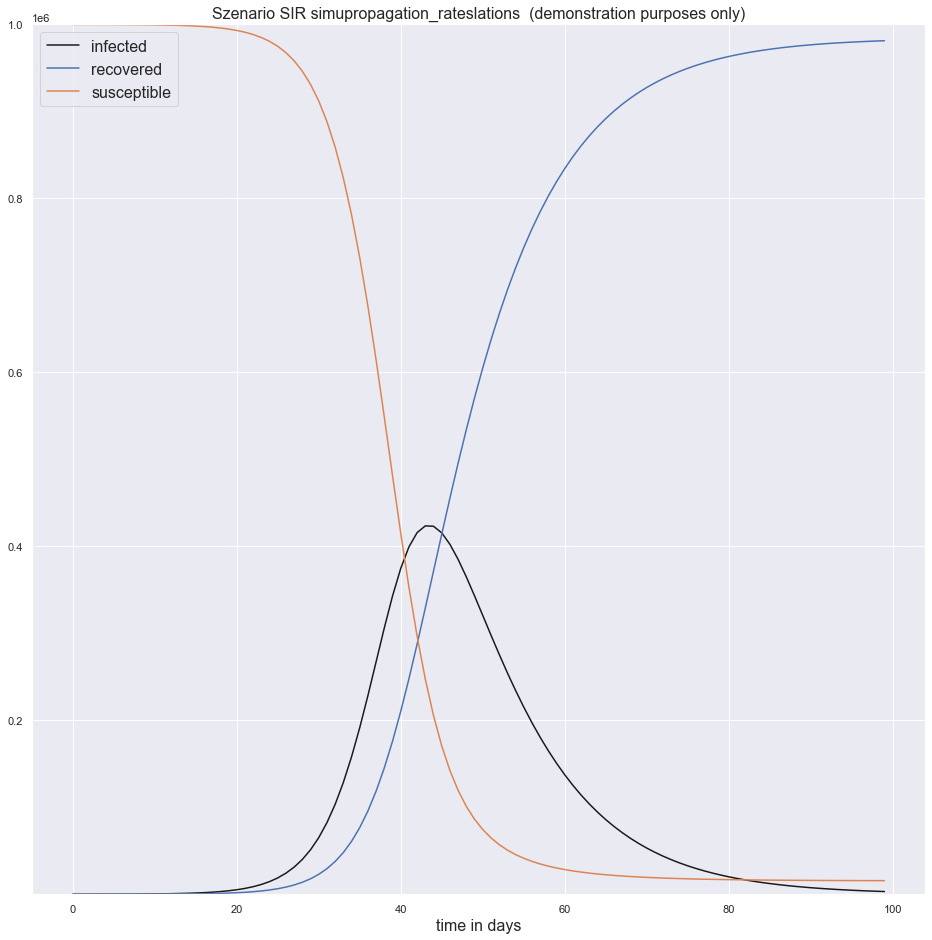

In [47]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simupropagation_rateslations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Part(2(a) of 2) DashBoard 1 (Dynamic Simulation only, without Free Parameters)

# Fitting the parameters of SIR model




In [48]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt



def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI


In [49]:
 #print(options)

In [50]:
country_list = ['US', 'Brazil', 'India', 'Russia', 'Spain', 'United Kingdom', 'Italy', 'Peru', 'Iran', 'Mexico', 'France', 'Germany', 'Chile', 'South Africa', 'Turkey', 'Pakistan', 'Saudi Arabia', 'Colombia', 'China', 'Bangladesh', 'Canada', 'Argentina', 'Qatar', 'Belgium', 'Indonesia', 'Ecuador', 'Sweden', 'Iraq', 'Netherlands', 'Egypt', 'Philippines', 'Belarus', 'Ukraine', 'United Arab Emirates', 'Portugal', 'Kuwait', 'Kazakhstan', 'Singapore', 'Israel', 'Oman', 'Switzerland', 'Dominican Republic', 'Bolivia', 'Panama', 'Poland', 'Romania', 'Ireland', 'Japan', 'Bahrain', 'Afghanistan', 'Nigeria', 'Guatemala', 'Armenia', 'Austria', 'Honduras', 'Ghana', 'Serbia', 'Algeria', 'Korea, South', 'Azerbaijan', 'Morocco', 'Moldova', 'Denmark', 'Czechia', 'Kyrgyzstan', 'Australia', 'Uzbekistan', 'Cameroon', 'Nepal', 'Norway', 'Kenya', 'Venezuela', 'Malaysia', "Cote d'Ivoire", 'Ethiopia', 'El Salvador', 'Costa Rica', 'Finland', 'Sudan', 'Bosnia and Herzegovina', 'Senegal', 'Bulgaria', 'North Macedonia', 'Luxembourg', 'Congo (Kinshasa)', 'West Bank and Gaza', 'Guinea', 'Tajikistan', 'Madagascar', 'Gabon', 'Haiti', 'Hungary', 'Greece', 'Kosovo', 'Djibouti', 'Croatia', 'Thailand', 'Mauritania', 'Albania', 'Paraguay', 'Lebanon', 'Zambia', 'Central African Republic', 'Maldives', 'Cuba', 'Somalia', 'Equatorial Guinea', 'Estonia', 'Iceland', 'Lithuania', 'Slovenia', 'Slovakia', 'Sri Lanka', 'Nicaragua', 'Libya', 'Mali', 'New Zealand', 'Malawi', 'Congo (Brazzaville)', 'South Sudan', 'Guinea-Bissau', 'Tunisia', 'Zimbabwe', 'Montenegro', 'Cabo Verde', 'Latvia', 'Eswatini', 'Sierra Leone', 'Cyprus', 'Diamond Princess', 'Niger', 'Uruguay', 'Rwanda', 'Burkina Faso', 'Jordan', 'Mozambique', 'Andorra', 'Georgia', 'Benin', 'Namibia', 'Yemen', 'Malta', 'Suriname', 'San Marino', 'Uganda', 'Chad', 'Jamaica', 'Liberia', 'Togo', 'Sao Tome and Principe', 'Zambia', 'Angola', 'Tanzania', 'Vietnam', 'Syria', 'Mauritius', 'Botswana', 'Gambia', 'Bahamas', 'Burma', 'Guyana', 'Lesotho', 'Comoros', 'Trinidad and Tobago', 'Mongolia', 'Cambodia', 'Burundi', 'Brunei', 'Eritrea', 'Monaco', 'Barbados', 'Liechtenstein', 'Belize', 'Bhutan', 'Seychelles', 'Antigua and Barbuda', 'Papua New Guinea', 'Saint Vincent and the Grenadines', 'Timor-Leste', 'Grenada', 'Fiji', 'Saint Lucia', 'Laos', 'Dominica', 'Saint Kitts and Nevis', 'Holy See', 'MS Zaandam', 'Western Sahara']

In [51]:
# country_list = country_list[1:5]
options = []
for each in country_list:
    d = {}
    d['label'] = each
    d['value'] = each

    options.append(d)



In [52]:
for i in options:
    print(i)

{'label': 'US', 'value': 'US'}
{'label': 'Brazil', 'value': 'Brazil'}
{'label': 'India', 'value': 'India'}
{'label': 'Russia', 'value': 'Russia'}
{'label': 'Spain', 'value': 'Spain'}
{'label': 'United Kingdom', 'value': 'United Kingdom'}
{'label': 'Italy', 'value': 'Italy'}
{'label': 'Peru', 'value': 'Peru'}
{'label': 'Iran', 'value': 'Iran'}
{'label': 'Mexico', 'value': 'Mexico'}
{'label': 'France', 'value': 'France'}
{'label': 'Germany', 'value': 'Germany'}
{'label': 'Chile', 'value': 'Chile'}
{'label': 'South Africa', 'value': 'South Africa'}
{'label': 'Turkey', 'value': 'Turkey'}
{'label': 'Pakistan', 'value': 'Pakistan'}
{'label': 'Saudi Arabia', 'value': 'Saudi Arabia'}
{'label': 'Colombia', 'value': 'Colombia'}
{'label': 'China', 'value': 'China'}
{'label': 'Bangladesh', 'value': 'Bangladesh'}
{'label': 'Canada', 'value': 'Canada'}
{'label': 'Argentina', 'value': 'Argentina'}
{'label': 'Qatar', 'value': 'Qatar'}
{'label': 'Belgium', 'value': 'Belgium'}
{'label': 'Indonesia', 'va

# Part (2(b) of 2) DashBoard 2 (Dynamic Simulation of Free Parameters)

In [ ]:

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html

fig = go.Figure()
app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    
    dcc.Dropdown(
        id='country_drop_down',
        options= options,
        value=['India', 'US',], # which are pre-selected
        multi=True
    ),  
    
    html.Label('t_initial'),
    html.Div(''),    
    dcc.Input(id="t_initial", type="text", placeholder="28", value=28),
    html.Div(''),    
    
    
    html.Label('t_intro_measures'),
    html.Div(''),
    dcc.Input(id="t_intro_measures", type="text", placeholder="14", value=14),
    html.Div(''),    
    
    
    
    html.Label('t_hold'),
    html.Div(''),
    dcc.Input(id="t_hold", type="text", placeholder="100", value=100),
    html.Div(''),    
    
    
    
    html.Label('t_relax'),
    html.Div(''),
    dcc.Input(id="t_relax", type="text", placeholder="50", value=50),
    html.Div(''),    
    
    
        
    dcc.Graph(figure=fig, id='main_window_slope')
])




from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value'),
    Input('t_initial', 'value'),
    Input('t_intro_measures', 'value'),
    Input('t_hold', 'value'),
    Input('t_relax', 'value')],             
             )

def update_figure(country_list, t_initial=1, t_intro_measures=1, t_hold=1, t_relax=1): 
    
    traces = [] 
        
    t_initial=int(t_initial)
    t_intro_measures=int(t_intro_measures)
    t_hold=int(t_hold)
    t_relax=int(t_relax)
        
    for each in country_list:
        print(each)
        ydata = np.array(df_analyse[each][35:])
        print(ydata)
        t=np.arange(len(ydata))

        # ensure re-initialization 
        I0=ydata[0]
        S0=N0-I0
        R0=0
                

        SIR=np.array([S0,I0,R0])
        propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                                'infected':I0,
                                                'recoverd':R0})
        
       
        beta_max=0.4
        beta_min=0.11
        gamma=0.1
                

        pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                           np.linspace(beta_max,beta_min,t_intro_measures),
                           np.array(t_hold*[beta_min]),
                            np.linspace(beta_min,beta_max,t_relax),
                           ))
                


        for each_beta in pd_beta:

            new_delta_vec=SIR_model(SIR,each_beta,gamma)

            SIR=SIR+new_delta_vec

            propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                        'infected':SIR[1],
                                                        'recovered':SIR[2]}, ignore_index=True)


        
        
        traces.append(dict(x=pd.Series(propagation_rates.index),
                                y=pd.Series(df_analyse[each]),
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )        
                
        
        traces.append(dict(x=pd.Series(propagation_rates.index),
                                y=pd.Series(propagation_rates.infected),
                                mode='lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each + ' Predicted'
                        )
                )        
        
                
    return {'data': traces, 'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="SIR Curve)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),

                      },
                yaxis={'type':"log",
                       'range':'[1.1,7.5]'
                      }
        )
    }

# change these values
PORT = 8051

if __name__ == '__main__':
    app.run_server(
        port=PORT)


Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8051 (Press CTRL+C to quit)
127.0.0.1 - - [28/Jul/2022 22:08:05] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Jul/2022 22:08:05] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [28/Jul/2022 22:08:05] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [28/Jul/2022 22:08:05] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [28/Jul/2022 22:08:05] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -


India
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'India'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\nithi\AppData\Local\Programs\Python\

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'India'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python

127.0.0.1 - - [28/Jul/2022 22:08:05] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [28/Jul/2022 22:08:05] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [28/Jul/2022 23:43:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Jul/2022 23:43:45] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [28/Jul/2022 23:43:45] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [28/Jul/2022 23:43:45] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [28/Jul/2022 23:43:45] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [28/Jul/2022 23:43:45] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -


India
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'India'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\nithi\AppData\Local\Programs\Python\

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'India'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python

127.0.0.1 - - [28/Jul/2022 23:43:45] "POST /_dash-update-component HTTP/1.1" 500 -


US
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'US'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'US'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310

127.0.0.1 - - [28/Jul/2022 23:43:49] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [28/Jul/2022 23:43:50] "POST /_dash-update-component HTTP/1.1" 200 -


Spain
[      13       15       32       45       84      120      165      222
      259      400      500      673     1073     1695     2277     2277
     5232     6391     7798     9942    11748    13910    17963    20410
    25374    28768    35136    39885    49515    57786    65719    73235
    80110    87956    95923   104118   112065   119199   126168   131646
   136675   141942   148220   153222   158273   163027   166831   170099
   172541   177644   184948   190839   191726   198674   200210   204178
   208389   213024   202990   205905   207634   209465   210773   212917
   213435   215216   216582   217466   218011   219329   220325   221447
   222857   223578   224350   227436   228030   228691   229540   230183
   230698   230698   231606   232037   232555   233037   234824   235290
   235772   235400   236259   236259   237906   238564   239228   239479
   239638   239932   240326   240660   240978   241310   241550   241717
   241966   242280   242707   243209   243605

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

127.0.0.1 - - [28/Jul/2022 23:44:01] "POST /_dash-update-component HTTP/1.1" 200 -


Spain
[      13       15       32       45       84      120      165      222
      259      400      500      673     1073     1695     2277     2277
     5232     6391     7798     9942    11748    13910    17963    20410
    25374    28768    35136    39885    49515    57786    65719    73235
    80110    87956    95923   104118   112065   119199   126168   131646
   136675   141942   148220   153222   158273   163027   166831   170099
   172541   177644   184948   190839   191726   198674   200210   204178
   208389   213024   202990   205905   207634   209465   210773   212917
   213435   215216   216582   217466   218011   219329   220325   221447
   222857   223578   224350   227436   228030   228691   229540   230183
   230698   230698   231606   232037   232555   233037   234824   235290
   235772   235400   236259   236259   237906   238564   239228   239479
   239638   239932   240326   240660   240978   241310   241550   241717
   241966   242280   242707   243209   243605

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

India
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'India'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\nithi\AppData\Local\Programs\Python\

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'India'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python

127.0.0.1 - - [28/Jul/2022 23:45:35] "POST /_dash-update-component HTTP/1.1" 500 -


India
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'India'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\nithi\AppData\Local\Programs\Python\

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'India'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python

127.0.0.1 - - [28/Jul/2022 23:45:49] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [28/Jul/2022 23:46:02] "POST /_dash-update-component HTTP/1.1" 200 -


Italy
[     453      655      888     1128     1694     2036     2502     3089
     3858     4636     5883     7375     9172    10149    12462    15113
    17660    21157    24747    27980    31506    35713    41035    47021
    53578    59138    63927    69176    74386    80589    86498    92472
    97689   101739   105792   110574   115242   119827   124632   128948
   132547   135586   139422   143626   147577   152271   156363   159516
   162488   165155   168941   172434   175925   178972   181228   183957
   187327   189973   192994   195351   197675   199414   201505   203591
   205463   207428   209328   210717   211938   213013   214457   215858
   217185   218268   219070   219814   221216   222104   223096   223885
   224760   225435   225886   226699   227364   228006   228658   229327
   229858   230158   230555   231139   231732   232248   232664   232997
   233197   233515   233836   234013   234531   234801   234998   235278
   235561   235763   236142   236305   236651

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Italy
[     453      655      888     1128     1694     2036     2502     3089
     3858     4636     5883     7375     9172    10149    12462    15113
    17660    21157    24747    27980    31506    35713    41035    47021
    53578    59138    63927    69176    74386    80589    86498    92472
    97689   101739   105792   110574   115242   119827   124632   128948
   132547   135586   139422   143626   147577   152271   156363   159516
   162488   165155   168941   172434   175925   178972   181228   183957
   187327   189973   192994   195351   197675   199414   201505   203591
   205463   207428   209328   210717   211938   213013   214457   215858
   217185   218268   219070   219814   221216   222104   223096   223885
   224760   225435   225886   226699   227364   228006   228658   229327
   229858   230158   230555   231139   231732   232248   232664   232997
   233197   233515   233836   234013   234531   234801   234998   235278
   235561   235763   236142   236305   236651

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Spain
[      13       15       32       45       84      120      165      222
      259      400      500      673     1073     1695     2277     2277
     5232     6391     7798     9942    11748    13910    17963    20410
    25374    28768    35136    39885    49515    57786    65719    73235
    80110    87956    95923   104118   112065   119199   126168   131646
   136675   141942   148220   153222   158273   163027   166831   170099
   172541   177644   184948   190839   191726   198674   200210   204178
   208389   213024   202990   205905   207634   209465   210773   212917
   213435   215216   216582   217466   218011   219329   220325   221447
   222857   223578   224350   227436   228030   228691   229540   230183
   230698   230698   231606   232037   232555   233037   234824   235290
   235772   235400   236259   236259   237906   238564   239228   239479
   239638   239932   240326   240660   240978   241310   241550   241717
   241966   242280   242707   243209   243605

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Italy
[     453      655      888     1128     1694     2036     2502     3089
     3858     4636     5883     7375     9172    10149    12462    15113
    17660    21157    24747    27980    31506    35713    41035    47021
    53578    59138    63927    69176    74386    80589    86498    92472
    97689   101739   105792   110574   115242   119827   124632   128948
   132547   135586   139422   143626   147577   152271   156363   159516
   162488   165155   168941   172434   175925   178972   181228   183957
   187327   189973   192994   195351   197675   199414   201505   203591
   205463   207428   209328   210717   211938   213013   214457   215858
   217185   218268   219070   219814   221216   222104   223096   223885
   224760   225435   225886   226699   227364   228006   228658   229327
   229858   230158   230555   231139   231732   232248   232664   232997
   233197   233515   233836   234013   234531   234801   234998   235278
   235561   235763   236142   236305   236651

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Spain
[      13       15       32       45       84      120      165      222
      259      400      500      673     1073     1695     2277     2277
     5232     6391     7798     9942    11748    13910    17963    20410
    25374    28768    35136    39885    49515    57786    65719    73235
    80110    87956    95923   104118   112065   119199   126168   131646
   136675   141942   148220   153222   158273   163027   166831   170099
   172541   177644   184948   190839   191726   198674   200210   204178
   208389   213024   202990   205905   207634   209465   210773   212917
   213435   215216   216582   217466   218011   219329   220325   221447
   222857   223578   224350   227436   228030   228691   229540   230183
   230698   230698   231606   232037   232555   233037   234824   235290
   235772   235400   236259   236259   237906   238564   239228   239479
   239638   239932   240326   240660   240978   241310   241550   241717
   241966   242280   242707   243209   243605

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

France
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'France'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\nithi\AppData\Local\Programs\Pytho

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'France'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2077, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\nithi\AppData\Local\Programs\Python\Pytho

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

127.0.0.1 - - [28/Jul/2022 23:46:38] "POST /_dash-update-component HTTP/1.1" 500 -


Italy
[     453      655      888     1128     1694     2036     2502     3089
     3858     4636     5883     7375     9172    10149    12462    15113
    17660    21157    24747    27980    31506    35713    41035    47021
    53578    59138    63927    69176    74386    80589    86498    92472
    97689   101739   105792   110574   115242   119827   124632   128948
   132547   135586   139422   143626   147577   152271   156363   159516
   162488   165155   168941   172434   175925   178972   181228   183957
   187327   189973   192994   195351   197675   199414   201505   203591
   205463   207428   209328   210717   211938   213013   214457   215858
   217185   218268   219070   219814   221216   222104   223096   223885
   224760   225435   225886   226699   227364   228006   228658   229327
   229858   230158   230555   231139   231732   232248   232664   232997
   233197   233515   233836   234013   234531   234801   234998   235278
   235561   235763   236142   236305   236651

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Spain
[      13       15       32       45       84      120      165      222
      259      400      500      673     1073     1695     2277     2277
     5232     6391     7798     9942    11748    13910    17963    20410
    25374    28768    35136    39885    49515    57786    65719    73235
    80110    87956    95923   104118   112065   119199   126168   131646
   136675   141942   148220   153222   158273   163027   166831   170099
   172541   177644   184948   190839   191726   198674   200210   204178
   208389   213024   202990   205905   207634   209465   210773   212917
   213435   215216   216582   217466   218011   219329   220325   221447
   222857   223578   224350   227436   228030   228691   229540   230183
   230698   230698   231606   232037   232555   233037   234824   235290
   235772   235400   236259   236259   237906   238564   239228   239479
   239638   239932   240326   240660   240978   241310   241550   241717
   241966   242280   242707   243209   243605

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Italy
[     453      655      888     1128     1694     2036     2502     3089
     3858     4636     5883     7375     9172    10149    12462    15113
    17660    21157    24747    27980    31506    35713    41035    47021
    53578    59138    63927    69176    74386    80589    86498    92472
    97689   101739   105792   110574   115242   119827   124632   128948
   132547   135586   139422   143626   147577   152271   156363   159516
   162488   165155   168941   172434   175925   178972   181228   183957
   187327   189973   192994   195351   197675   199414   201505   203591
   205463   207428   209328   210717   211938   213013   214457   215858
   217185   218268   219070   219814   221216   222104   223096   223885
   224760   225435   225886   226699   227364   228006   228658   229327
   229858   230158   230555   231139   231732   232248   232664   232997
   233197   233515   233836   234013   234531   234801   234998   235278
   235561   235763   236142   236305   236651

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Spain
[      13       15       32       45       84      120      165      222
      259      400      500      673     1073     1695     2277     2277
     5232     6391     7798     9942    11748    13910    17963    20410
    25374    28768    35136    39885    49515    57786    65719    73235
    80110    87956    95923   104118   112065   119199   126168   131646
   136675   141942   148220   153222   158273   163027   166831   170099
   172541   177644   184948   190839   191726   198674   200210   204178
   208389   213024   202990   205905   207634   209465   210773   212917
   213435   215216   216582   217466   218011   219329   220325   221447
   222857   223578   224350   227436   228030   228691   229540   230183
   230698   230698   231606   232037   232555   233037   234824   235290
   235772   235400   236259   236259   237906   238564   239228   239479
   239638   239932   240326   240660   240978   241310   241550   241717
   241966   242280   242707   243209   243605

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Germany
[      21       26       53       66      117      150      188      240
      349      534      684      847     1112     1296     1567     2369
     3062     3795     4838     6012     7156     8198    10999    13957
    16662    18610    22672    27436    31554    36508    42288    48582
    52547    57298    61913    67366    73522    79696    85778    91714
    95391    99225   103228   108202   113525   117658   120479   123016
   125098   127584   130450   133830   137439   139897   141672   143457
   145694   148046   150383   152438   154175   155193   156337   157641
   159119   160758   161703   162496   163175   163860   164807   166091
   167300   168551   169218   169575   170508   171306   172239   173152
   173772   174355   174697   175210   176007   176752   177212   177850
   178281   178570   179002   179364   179717   180458   181196   181482
   181815   182028   182370   182764   183271   183678   183979   184193
   184543   184861   185416   185674   1860

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\nithi\AppData\Local\Temp\ipykernel_23396\3132862711.py:110: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [ ]:
    for each in country_list:
        print(each)
        ydata = np.array(df_analyse[each][35:])
        #print(ydata)
        t=np.arange(len(ydata))

        # ensure re-initialization 
        I0=ydata[0]
        S0=N0-I0
        R0=0
                

        SIR=np.array([S0,I0,R0])
        propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                                'infected':I0,
                                                'recoverd':R0})
        
       
        beta_max=0.4
        beta_min=0.11
        gamma=0.1
                

        pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                           np.linspace(beta_max,beta_min,t_intro_measures),
                           np.array(t_hold*[beta_min]),
                            np.linspace(beta_min,beta_max,t_relax),
                           ))
                